# 심화 학습 : 주성분 분석

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 주성분 분석 소개

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

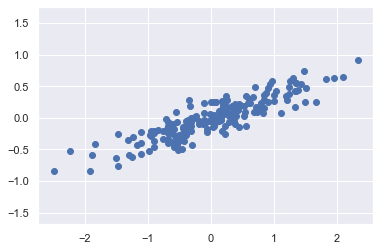

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [5]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0, color = 'black')
    ax.annotate('', v1, v0, arrowprops = arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

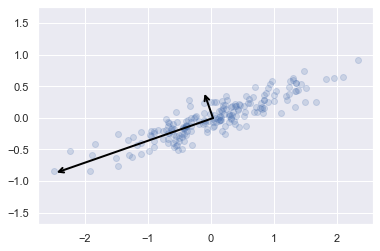

In [6]:
# 데이터 플로팅
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

### PCA 응용 : 차원 축소

In [7]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape :", X.shape)
print("transformed shape :", X_pca.shape)

original shape : (200, 2)
transformed shape : (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

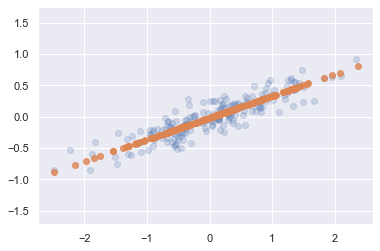

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis('equal')

### PCA를 사용한 시각화 : 손으로 쓴 숫자

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


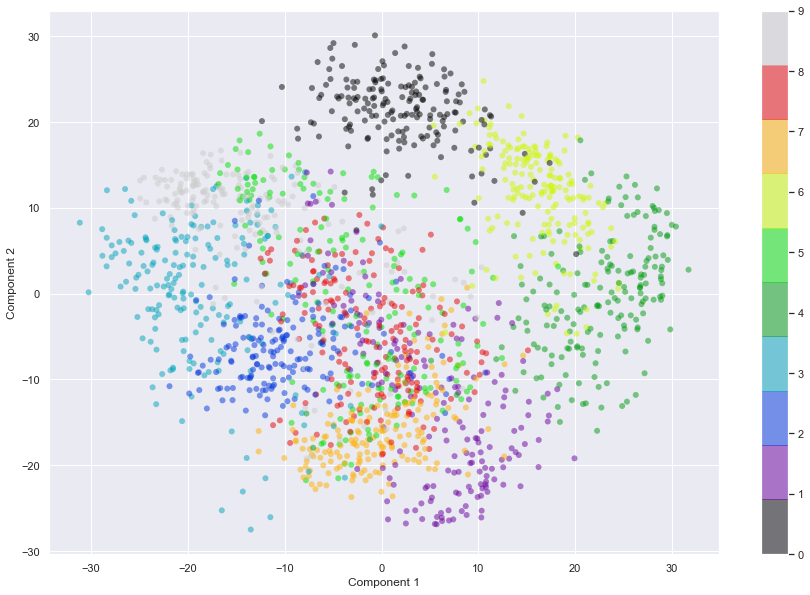

In [11]:
plt.figure(figsize = (15, 10))
plt.scatter(projected[:, 0], projected[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

### 성분은 무엇을 의미하는가?

### 성분의 개수 선택

Text(0, 0.5, 'cumulative explained variance')

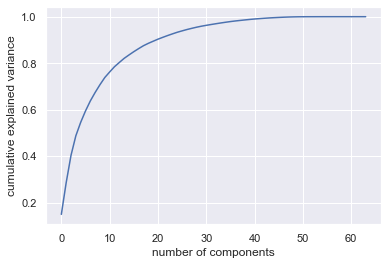

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## PCA 응용 : 노이즈 필터링

In [13]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap = 'binary', interpolation = 'nearest', clim = (0, 16))

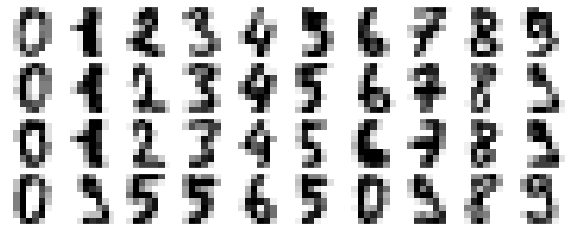

In [14]:
plot_digits(digits.data)

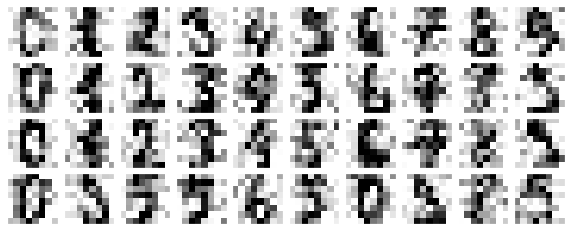

In [15]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [16]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

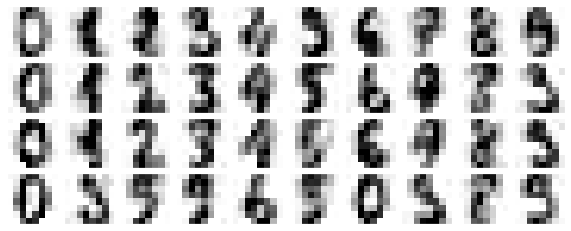

In [17]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## 예제 : 고유 얼굴

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [19]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver = 'randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

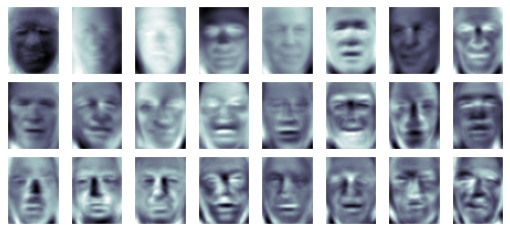

In [20]:
fig, axes = plt.subplots(3, 8, figsize = (9, 4), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap = 'bone')

Text(0, 0.5, 'cumulative explained variance')

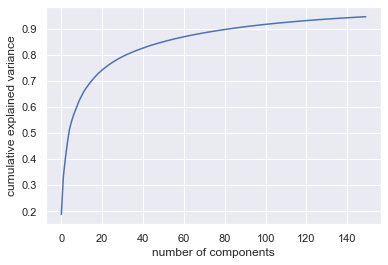

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, '150-dim\nreconstruction')

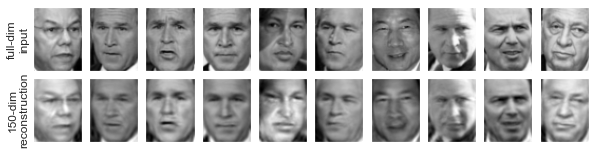

In [22]:
# 성분과 사영된 얼굴 계산
pca = PCA(150, svd_solver = 'randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# 결과 플로팅
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap = 'binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

## 주성분 분석 정리

1. 장점
    * 고차원 데이터에 대한 통찰력을 얻을 수 있는 간단하고 효율적인 방식 제공한다.<br><br>
2. 약점
    * 데이터의 이상치에 의해 심하게 영향을 받는 경향이 있다.
    * RandomizedPCA, SparsePCA 모두 PCA를 변형하여 초기 성분이 잘 설명하지 못하는 데이터점을 반복적으로 제거하는 방식이다.
        - RandomizedPCA는 아주 높은 차원의 데이터에 처음 몇 개의 주성분을 빠르게 접근시키기 위해 비결정적 방식을 사용
        - SparsePCA는 성분의 희소성을 강화하기 위해 정규화 조건을 도입